In [73]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import *
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import pickle
import operator
from wordcloud import WordCloud
from PIL import Image
import string

In [2]:
eng_stop=stopwords.words('english')

In [3]:
eng_stop[0:5]

['i', 'me', 'my', 'myself', 'we']

In [4]:
df=pd.read_pickle('song_lyric_df.pkl')

In [5]:
df.head()

,song,lyrics
0,1822,"[[Speech], John: This is a Dorsey Burnette num..."
1,a day in the life,"[I read the news today oh, boy, About a lucky ..."
2,a hard days night,"[It's been a hard day's night, and I've been w..."
3,a little rhyme,"[[Speech], Rodney Burke: Now, for the final nu..."
4,a shot of rhythm blues,"[Well, if your hands start a-clapping, And you..."


In [6]:
df['speech_check']=df.lyrics.apply(lambda x: x[0])

In [7]:
df.head()

,song,lyrics,speech_check
0,1822,"[[Speech], John: This is a Dorsey Burnette num...",[Speech]
1,a day in the life,"[I read the news today oh, boy, About a lucky ...","I read the news today oh, boy"
2,a hard days night,"[It's been a hard day's night, and I've been w...","It's been a hard day's night, and I've been wo..."
3,a little rhyme,"[[Speech], Rodney Burke: Now, for the final nu...",[Speech]
4,a shot of rhythm blues,"[Well, if your hands start a-clapping, And you...","Well, if your hands start a-clapping"


In [8]:
df[df.speech_check=='[Speech]']

,song,lyrics,speech_check
0,1822,"[[Speech], John: This is a Dorsey Burnette num...",[Speech]
3,a little rhyme,"[[Speech], Rodney Burke: Now, for the final nu...",[Speech]
27,beatle greetings,"[[Speech], Ringo: I'm Ringo and I play the dru...",[Speech]
49,crinsk dee night,"[[Speech], Brian Matthew: The next few minutes...",[Speech]
54,dear wack,"[[Speech], Brian Matthew: But despite the fact...",[Speech]
94,have a banana,"[[Speech], Brian Matthew: Is that it? Is that ...",[Speech]
153,just a rumour,"[[Speech], Alan Freeman: George, is it true th...",[Speech]
169,love these goon shows,"[[Speech], Lee Peters: But now, John has his w...",[Speech]


In [9]:
len(df[df.speech_check=='[Speech]'])

8

In [10]:
df=df[df.speech_check!='[Speech]']

In [14]:
df.drop('speech_check',axis=1,inplace=True)

In [11]:
df.reset_index(inplace=True)

In [12]:
df.drop('index',axis=1,inplace=True)

In [15]:
df.head()

,song,lyrics
0,a day in the life,"[I read the news today oh, boy, About a lucky ..."
1,a hard days night,"[It's been a hard day's night, and I've been w..."
2,a shot of rhythm blues,"[Well, if your hands start a-clapping, And you..."
3,a taste of honey,"[A taste of honey., Tasting much sweeter than ..."
4,across the universe,[Words are flowing out like endless rain into ...


In [16]:
len(df)

192

In [17]:
every_lyrics=[]
for i in range(len(df)):
    every_lyrics.append(df.lyrics[i])

In [19]:
every_lyrics[0]

['I read the news today oh, boy',
 'About a lucky man who made the grade',
 'And though the news was rather sad',
 'Well, I just had to laugh',
 'I saw the photograph',
 'He blew his mind out in a car',
 "He didn't notice that the lights had changed",
 'A crowd of people stood and stared',
 "They'd seen his face before",
 'Nobody was really sure if he was from the house of lords',
 'I saw a film today oh, boy',
 'The english army had just won the war',
 'A crowd of people turned away',
 'But I just had to look',
 'Having read the book',
 "I'd love to turn you on.",
 'Woke up, fell out of bed',
 'Dragged a comb across my head',
 'Found my way downstairs and drank a cup',
 'And looking up, I noticed I was late',
 'Found my coat and grabbed my hat',
 'Made the bus in seconds flat',
 'Found my way upstairs and had a smoke',
 'And somebody spoke and I went into a dream',
 'Ah',
 'I read the news today oh, boy',
 'Four thousand holes in blackburn, lancashire',
 'And though the holes were rat

In [30]:
btls_phrase_cnt={}
for song in every_lyrics:
    for word in song:
        if word not in btls_phrase_cnt.keys():
            btls_phrase_cnt[word]=1
        else:
            btls_phrase_cnt[word]+=1

In [35]:
btls_ltr_cnt={}
for song in every_lyrics:
    for line in song:
        for word in line:
            if word not in btls_ltr_cnt.keys():
                btls_ltr_cnt[word]=1
            else:
                btls_ltr_cnt[word]+=1

In [52]:
btls_wrd_cnt={}
for song in every_lyrics:
    for line in song:
        for word in line.split():
            if word not in btls_wrd_cnt.keys():
                btls_wrd_cnt[word]=1
            else:
                btls_wrd_cnt[word]+=1

In [53]:
sorted_words = sorted(btls_wrd_cnt.items(), key=operator.itemgetter(1))
sorted_words[0:5]

[('grade', 1), ('photograph', 1), ('notice', 1), ('lights', 1), ('stood', 1)]

In [54]:
sorted_words[::-1][0:5]

[('I', 1203), ('you', 1127), ('the', 792), ('to', 683), ('me', 576)]

In [55]:
sorted_words=sorted_words[::-1]

In [56]:
sorted_words[0:5]

[('I', 1203), ('you', 1127), ('the', 792), ('to', 683), ('me', 576)]

In [57]:
new_sorts=[]
for word in sorted_words:
    if word[0] not in eng_stop:
        new_sorts.append(word)

In [59]:
new_sorts[0:10]

[('I', 1203),
 ("I'm", 313),
 ('And', 286),
 ('love', 264),
 ('know', 184),
 ('You', 143),
 ('want', 141),
 ('got', 138),
 ('baby', 131),
 ("I'll", 127)]

In [63]:
new_sorts=new_sorts[1:]

In [64]:
new_sorts[0:10]

[('love', 264),
 ('know', 184),
 ('You', 143),
 ('want', 141),
 ('got', 138),
 ('baby', 131),
 ("I'll", 127),
 ('But', 126),
 ('say', 124),
 ('get', 109)]

In [76]:
new_sorts.remove(("I'll", 127))

In [77]:
new_sorts[0:10]

[('love', 264),
 ('know', 184),
 ('You', 143),
 ('want', 141),
 ('got', 138),
 ('baby', 131),
 ('But', 126),
 ('say', 124),
 ('get', 109),
 ('Oh', 107)]

In [72]:
btls_wrds_dict=dict(new_sorts)

In [105]:
len(string.punctuation)

32

In [106]:
punct=[]
for i in range(0,32):
    punct.append(string.punctuation[i])

In [108]:
punct[0:5]

['!', '"', '#', '$', '%']

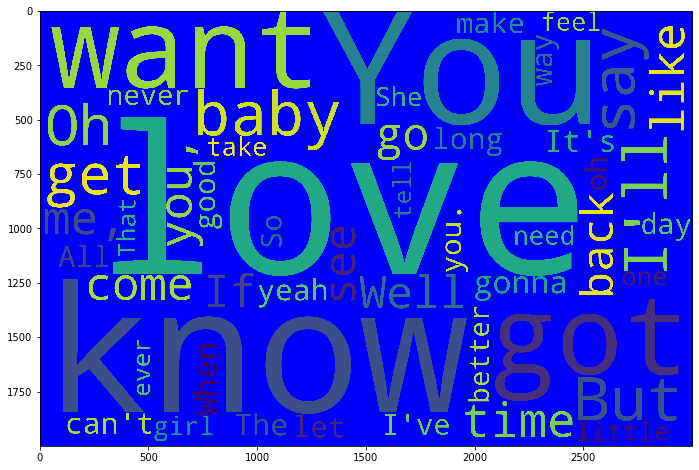

In [85]:
plt.figure(figsize=(15,8))
wc = WordCloud(background_color="blue",width=3000,height=2000, max_words=50,normalize_plurals=True).generate_from_frequencies(btls_wrds_dict)
plt.tight_layout()
plt.imshow(wc)

In [133]:
# remove punctuation from words in word cloud